In [1]:
# Sample API
import flowx
import simulation
import numpy
flowx.__version__

ModuleNotFoundError: No module named 'flowx'

In [2]:
# Define grid parameters
nx, ny = 10, 10

xmin, xmax = 0.0, 2.0*numpy.pi
ymin, ymax = 0.0, 2.0*numpy.pi

# Define cell-centered variable names
center_vars = ['pres', 'divv', 'asol', 'eror']
face_vars   = ['velc', 'hvar', 'asol', 'eror']

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_pres = {'pres': ['neumann', 'neumann', 'neumann', 'neumann']}
bc_val_pres  = {'pres': [0.0, 0.0, 0.0, 0.0]}

bc_type_u = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_u  = {'velc': [0.0, 0.0, 0.0, 0.0]}

bc_type_v = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_v  = {'velc': [0.0, 0.0, 0.0, 0.0]}

# Create the grid and data
gridc = flowx.Grid('cell-centered', center_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_pres, user_bc_val=bc_val_pres)

gridx = flowx.Grid('x-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_u, user_bc_val=bc_val_u)

gridy = flowx.Grid('y-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_v, user_bc_val=bc_val_v)

scalars = flowx.Scalars(tmax=2, dt=0.001, Re=1.0)

simulation.update_bc_val(gridx, gridy, 'velc', scalars.variable['to'])

In [3]:
simulation.get_initial(gridc, gridx, gridy, 'velc', 'pres')

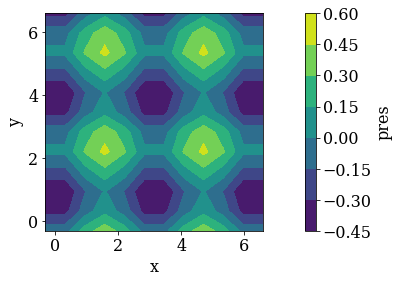

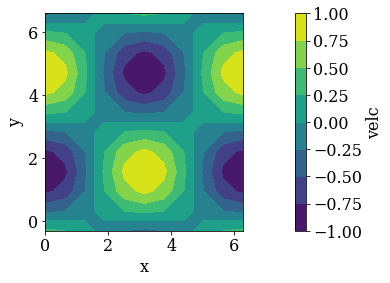

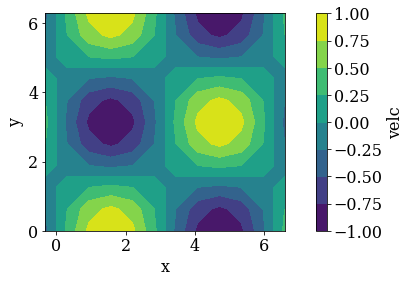

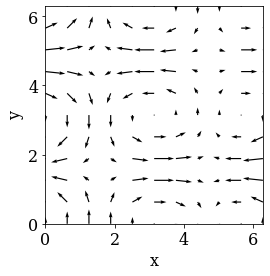

In [4]:
flowx.io.plot_contour(gridc, 'pres')
flowx.io.plot_contour(gridx, 'velc')
flowx.io.plot_contour(gridy, 'velc')
flowx.io.plot_vector(gridx, gridy, 'velc')

In [5]:
ins_vars = ['velc', 'hvar', 'divv', 'pres']

while scalars.variable['time'] <= scalars.variable['tmax']:
    
    # Update the time-dependent boundary condition value
    simulation.update_bc_val(gridx, gridy, 'velc', scalars.variable['time'])
    
    # Predictor Step
    flowx.ins.advance_euler(gridc, gridx, gridy, scalars, ins_vars, 'predictor')
    
    # Divergence Step
    flowx.ins.advance_euler(gridc, gridx, gridy, scalars, ins_vars, 'divergence')
    
    # Solve the pressure Poisson equation 
    scalars.stats['ites'], scalars.stats['res'] = flowx.poisson.solve_jacobi(gridc, 'pres', 'divv',
                                                                       maxiter=10000, tol=1e-9)
    # Corrector Step
    flowx.ins.advance_euler(gridc, gridx, gridy, scalars, ins_vars, 'corrector')
    
    # Display stats
    if scalars.variable['nstep'] % 10 == 0:
        flowx.io.display_stats(scalars)   
    
    scalars.advance()

------------ Time = 0.0 ---------------
Number of poisson iterations    : 564
Final poisson residual : 9.887575887451902e-10
Max, Min, U   : 1.0, -1.0
Max, Min, V   : 1.0, -1.0
Max, Min, P   : 1.1115920589692265, -1.052356243505085
Max, Min, DIV : 1.2682910277561632e-11, -1.26828547664104e-11


------------ Time = 0.010000000000000002 ---------------
Number of poisson iterations    : 77
Final poisson residual : 9.243905890239962e-10
Max, Min, U   : 0.9801986733067553, -0.9801986733067553
Max, Min, V   : 0.9801986733067553, -0.9801986733067553
Max, Min, P   : 0.43563599214114646, -0.36421502597894234
Max, Min, DIV : 1.4803089309900486e-11, -1.4802659098478443e-11


------------ Time = 0.02000000000000001 ---------------
Number of poisson iterations    : 76
Final poisson residual : 9.644441959953131e-10
Max, Min, U   : 0.9607894391523232, -0.9607894391523232
Max, Min, V   : 0.9607894391523232, -0.9607894391523232
Max, Min, P   : 0.41884150321008223, -0.35042221546526814
Max, Min, DIV : 1

------------ Time = 0.23000000000000018 ---------------
Number of poisson iterations    : 58
Final poisson residual : 9.617641713408819e-10
Max, Min, U   : 0.6383224322753368, -0.6383224322753257
Max, Min, V   : 0.6383224322753245, -0.6383224322753378
Max, Min, P   : 0.18317272650891045, -0.15608627267346759
Max, Min, DIV : 1.5400021535771913e-11, -1.5401215025523385e-11


------------ Time = 0.24000000000000019 ---------------
Number of poisson iterations    : 57
Final poisson residual : 9.19290872721553e-10
Max, Min, U   : 0.6260257267385223, -0.6260257267385115
Max, Min, V   : 0.6260257267385104, -0.626025726738523
Max, Min, P   : 0.17609220398626962, -0.15020890004236548
Max, Min, DIV : 1.4719031549148553e-11, -1.4721286689667323e-11


------------ Time = 0.25000000000000017 ---------------
Number of poisson iterations    : 55
Final poisson residual : 9.578805818223931e-10
Max, Min, U   : 0.6139659236313136, -0.6139659236313033
Max, Min, V   : 0.6139659236313025, -0.613965923631314

------------ Time = 0.46000000000000035 ---------------
Number of poisson iterations    : 54
Final poisson residual : 9.557102787887712e-10
Max, Min, U   : 0.408147802091728, -0.4081478020917218
Max, Min, V   : 0.4081478020917241, -0.4081478020917254
Max, Min, P   : 0.07397482281480681, -0.0648083522736483
Max, Min, DIV : 1.5297589583962434e-11, -1.5316650725516467e-11


------------ Time = 0.47000000000000036 ---------------
Number of poisson iterations    : 54
Final poisson residual : 9.906888151338951e-10
Max, Min, U   : 0.40029517312224505, -0.400295173122239
Max, Min, V   : 0.40029517312224133, -0.40029517312224244
Max, Min, P   : 0.07111624648550625, -0.06239009722663962
Max, Min, DIV : 1.5857787305506577e-11, -1.5876605585773973e-11


------------ Time = 0.48000000000000037 ---------------
Number of poisson iterations    : 55
Final poisson residual : 9.241300803482208e-10
Max, Min, U   : 0.3925944376437681, -0.39259443764376223
Max, Min, V   : 0.39259443764376456, -0.39259443764

------------ Time = 0.7300000000000005 ---------------
Number of poisson iterations    : 55
Final poisson residual : 9.950998027193457e-10
Max, Min, U   : 0.2417726976824613, -0.2417726976824581
Max, Min, V   : 0.24177269768246024, -0.2417726976824589
Max, Min, P   : 0.025549335012577206, -0.023332682519665818
Max, Min, DIV : 1.5932425517783955e-11, -1.5939118080954273e-11


------------ Time = 0.7400000000000005 ---------------
Number of poisson iterations    : 55
Final poisson residual : 9.840491283147312e-10
Max, Min, U   : 0.23713912199437118, -0.23713912199436807
Max, Min, V   : 0.2371391219943702, -0.23713912199436885
Max, Min, P   : 0.02456399848103756, -0.022470360469019617
Max, Min, DIV : 1.5755563520514215e-11, -1.5761968119587522e-11


------------ Time = 0.7500000000000006 ---------------
Number of poisson iterations    : 55
Final poisson residual : 9.725495820958996e-10
Max, Min, U   : 0.23259516529890809, -0.23259516529890503
Max, Min, V   : 0.23259516529890714, -0.232595

------------ Time = 1.0099999999999996 ---------------
Number of poisson iterations    : 51
Final poisson residual : 9.293900099366827e-10
Max, Min, U   : 0.1408403171402724, -0.14084031714027068
Max, Min, V   : 0.14084031714027206, -0.14084031714027084
Max, Min, P   : 0.008507617453136624, -0.008141339575596929
Max, Min, DIV : 1.4881340951178323e-11, -1.4884411411730802e-11


------------ Time = 1.0199999999999985 ---------------
Number of poisson iterations    : 51
Final poisson residual : 9.099395184436234e-10
Max, Min, U   : 0.1381567360029682, -0.13815673600296655
Max, Min, V   : 0.1381567360029679, -0.13815673600296668
Max, Min, P   : 0.008180514339362168, -0.007840454248434318
Max, Min, DIV : 1.4569966760857866e-11, -1.4572783951782853e-11


------------ Time = 1.0299999999999974 ---------------
Number of poisson iterations    : 50
Final poisson residual : 9.85370512086145e-10
Max, Min, U   : 0.13552490738721734, -0.13552490738721573
Max, Min, V   : 0.13552490738721704, -0.13552

Final poisson residual : 9.072172570673949e-10
Max, Min, U   : 0.09059248988975553, -0.09059248988975445
Max, Min, V   : 0.09059248988975545, -0.09059248988975449
Max, Min, P   : 0.0034574760685862913, -0.003434582080944374
Max, Min, DIV : 1.4527238786921082e-11, -1.4526834596351179e-11


------------ Time = 1.2499999999999731 ---------------
Number of poisson iterations    : 45
Final poisson residual : 9.795378376019513e-10
Max, Min, U   : 0.08887644605616446, -0.0888764460561634
Max, Min, V   : 0.08887644605616438, -0.08887644605616343
Max, Min, P   : 0.003324958442076642, -0.0033099946570415307
Max, Min, DIV : 1.5685298546119775e-11, -1.5684630677581524e-11


------------ Time = 1.259999999999972 ---------------
Number of poisson iterations    : 45
Final poisson residual : 9.555079455622177e-10
Max, Min, U   : 0.0871933750925737, -0.08719337509257268
Max, Min, V   : 0.08719337509257363, -0.0871933750925727
Max, Min, P   : 0.003197538925183545, -0.003189972479264663
Max, Min, DIV : 1

------------ Time = 1.4999999999999456 ---------------
Number of poisson iterations    : 39
Final poisson residual : 9.432860921317837e-10
Max, Min, U   : 0.05520044261188928, -0.055200442611888695
Max, Min, V   : 0.05520044261188924, -0.055200442611888695
Max, Min, P   : 0.0012541475314297667, -0.0013206051684298086
Max, Min, DIV : 1.510571615709333e-11, -1.509688121043018e-11


------------ Time = 1.5099999999999445 ---------------
Number of poisson iterations    : 39
Final poisson residual : 9.181615046333202e-10
Max, Min, U   : 0.05416294505763511, -0.05416294505763455
Max, Min, V   : 0.054162945057635074, -0.05416294505763454
Max, Min, P   : 0.0012062818183032843, -0.0012732060843538564
Max, Min, DIV : 1.4703464140675138e-11, -1.4694587560648564e-11


------------ Time = 1.5199999999999434 ---------------
Number of poisson iterations    : 38
Final poisson residual : 9.903498249219583e-10
Max, Min, U   : 0.053145278806305964, -0.053145278806305415
Max, Min, V   : 0.0531452788063059

Number of poisson iterations    : 31
Final poisson residual : 9.66300910581372e-10
Max, Min, U   : 0.031924846956480846, -0.03192484695648055
Max, Min, V   : 0.031924846956480846, -0.03192484695648054
Max, Min, P   : 0.0004069801147607881, -0.00046064048464262557
Max, Min, DIV : 1.5458252299732633e-11, -1.5436632007370665e-11


------------ Time = 1.7999999999999126 ---------------
Number of poisson iterations    : 31
Final poisson residual : 9.391536474434295e-10
Max, Min, U   : 0.03133092465241162, -0.03133092465241132
Max, Min, V   : 0.031330924652411614, -0.031330924652411316
Max, Min, P   : 0.00039153504376808864, -0.00044432596314844584
Max, Min, DIV : 1.502435242189959e-11, -1.500289172409741e-11


------------ Time = 1.8099999999999115 ---------------
Number of poisson iterations    : 31
Final poisson residual : 9.127328438029409e-10
Max, Min, U   : 0.03074827449782569, -0.030748274497825395
Max, Min, V   : 0.030748274497825683, -0.030748274497825388
Max, Min, P   : 0.000376679

In [6]:
simulation.get_analytical(gridc, gridx, gridy, 'asol', scalars.variable['time'])

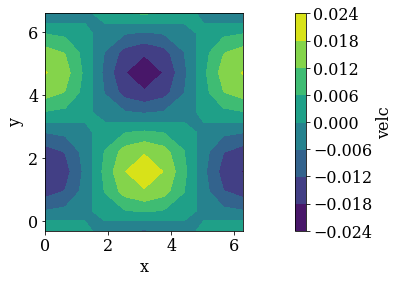

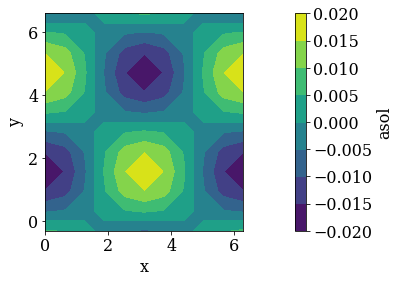

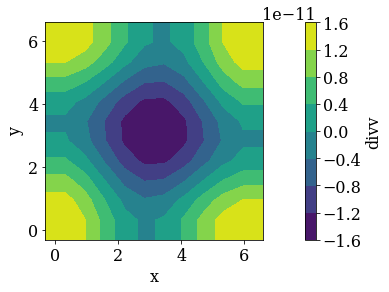

In [7]:
flowx.io.plot_contour(gridx, 'velc')
flowx.io.plot_contour(gridx, 'asol')
flowx.io.plot_contour(gridc, 'divv')

In [8]:
gridx.get_error('eror','velc','asol')
gridy.get_error('eror','velc','asol')

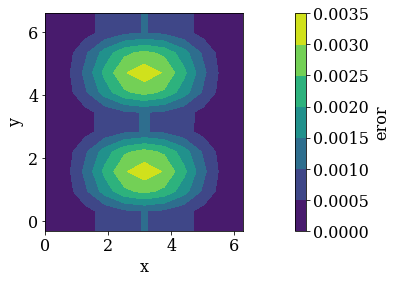

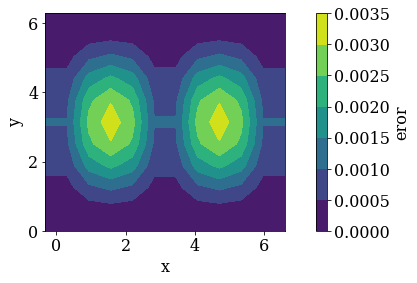

In [9]:
flowx.io.plot_contour(gridx, 'eror')
flowx.io.plot_contour(gridy, 'eror')

In [10]:
l2_norm = gridx.get_l2_norm('eror')


In [11]:
l2_norm

9.995112845638586e-05

In [23]:
l2 = [5.313257025349025e-07, 1.1987943862853993e-05, 9.995112845638586e-05]
delx = [42*42,22*22,12*12]
from matplotlib import pyplot

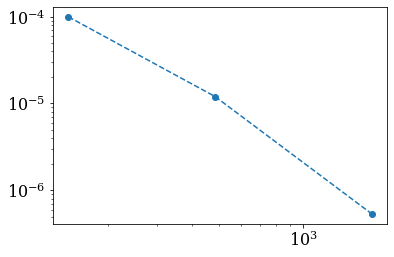

In [24]:
pyplot.loglog(delx, l2, color='C0', linestyle='--', marker='o')

1.88887063526222

In [26]:
slope, intercept = numpy.polyfit(numpy.log(delx), numpy.log(l2), 1)
print(slope)

-2.0937560303977305
